In [1]:
import pickle
file = open('y_train_bi', 'rb')

# dump information to that file
y_train = pickle.load(file)

# close the file
file.close()

In [2]:
import pickle
file = open('X_train_bi', 'rb')

# dump information to that file
X_train = pickle.load(file)

# close the file
file.close()

In [3]:
import os
import numpy as np
import pandas as pd
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
from PIL import Image
import PIL
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm

# Color Change

In [4]:
X_train

array([[[  0,   0,   3, ...,  24,  16,   9],
        [  0,   0,   2, ...,  22,  15,   8],
        [  0,   0,   1, ...,  21,  12,   4],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[ 10,  16,  13, ...,  25,  23,  20],
        [ 13,  15,  15, ...,  21,  18,  14],
        [ 13,  13,  15, ...,  20,  15,  13],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[125, 124, 124, ...,  32,  27,  22],
        [124, 122, 123, ...,  31,  26,  20],
        [125, 123, 123, ...,  30,  25,  19

In [5]:
X_train=np.stack([X_train]*3, axis=-1)

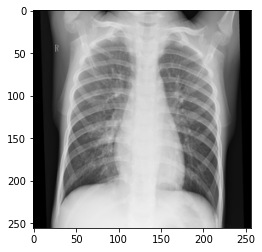

In [6]:
plt.imshow(X_train[2])

In [7]:
X_train = X_train / 255.0

# Model training

In [8]:
from tensorflow.keras import layers

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (256, 256, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [10]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
from tensorflow.keras import callbacks
es = callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [12]:
history = model.fit(X_train, y_train, batch_size=64, epochs=100, validation_split = 0.2, callbacks=[es])

Epoch 1/100
25/25 [==============================] - 109s 4s/step - loss: 3.7147 - accuracy: 0.4825 - val_loss: 0.5820 - val_accuracy: 0.6792
Epoch 2/100
25/25 [==============================] - 82s 3s/step - loss: 0.3921 - accuracy: 0.8195 - val_loss: 0.3677 - val_accuracy: 0.8296
Epoch 3/100
25/25 [==============================] - 86s 3s/step - loss: 0.2349 - accuracy: 0.9037 - val_loss: 0.2969 - val_accuracy: 0.8622
Epoch 4/100
25/25 [==============================] - 61s 2s/step - loss: 0.1732 - accuracy: 0.9399 - val_loss: 0.2874 - val_accuracy: 0.8947
Epoch 5/100
25/25 [==============================] - 59s 2s/step - loss: 0.1452 - accuracy: 0.9396 - val_loss: 0.2818 - val_accuracy: 0.8897
Epoch 6/100
25/25 [==============================] - 57s 2s/step - loss: 0.1298 - accuracy: 0.9540 - val_loss: 0.2566 - val_accuracy: 0.9023
Epoch 7/100
25/25 [==============================] - 56s 2s/step - loss: 0.0933 - accuracy: 0.9635 - val_loss: 0.3001 - val_accuracy: 0.8897
Epoch 8/100


In [13]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()
    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

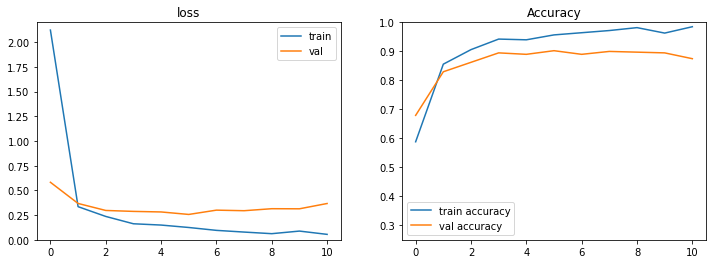

In [14]:
import matplotlib.pyplot as plt
plot_history(history)
plt.show()

In [15]:
from tensorflow.keras import models
# Let's say that you have a `model`
# You can save it :
models.save_model(model, '/Users/davidmedioni/code/dino120798/finalproject/model_bi_3')

INFO:tensorflow:Assets written to: /Users/davidmedioni/code/dino120798/finalproject/model_bi_3/assets
